**Workout Generator using Gensim Doc2Vec Model**

*The model aims to generate a list of workouts based on user input*

In [1]:
from os import listdir
import re
import matplotlib.pyplot as plt
from nltk import RegexpTokenizer
from stop_words import get_stop_words
from gensim.models.doc2vec import TaggedDocument
from gensim.parsing.porter import PorterStemmer
import gensim
import pandas as pd
import numpy as np

In [2]:
#grab data
docLabels=[]        
docLabels = [f for f in listdir("Data/Total_Data") if f.endswith('.txt')]

data=[]
for doc in docLabels:
    data.append(open('Data/Total_Data/' + doc).read())

In [3]:
for i in data[:5]:
    print(i)

"Nancy"
5 rounds for time of:
400 meter run
95 pound Overhead squat, 15 reps
Brian Mitchell 11:35, Aaron Moburg-Jones 12:07, Rob Orlando 12:14, Jay Maroney 14:59.
Post time to comments.
Compare to 110616.


Deadlift 1-1-1-1-1-1-1 reps
Post loads to comments.


Run 5 K
Post time to comments.
Compare to 091009.


Five rounds for time of:
135 pound Deadlift, 15 reps
135 pound Hang power clean, 12 reps
135 pound Front Squat, 9 reps
135 pound Push Jerk, 6 reps
Post time to comments.
Compare to 080702.


Workout 16.5
21-18-15-12-9-6-3 reps for time of:
Thrusters
Burpees
Men use 95 lb.
Women use 65 lb.
Compare to 140328.
Post time to comments and/or submit your score as part of the 2016 Reebok CrossFit Games Open.




In [4]:
#DATA CLEANING

#delete scores, post and comment substrings
regex_list = [r"Divide/s[^@]*.*", r"Multiply/s[^@]*.*", r"Add\s[^@]*.*", r"There is[^@]*.*", \
              r"[Nn]otes:[^@]*.[^@]*", r"[Pp]ost[^@]*.*", r"[Rr]eport[^@]*.*", r"In this[^@]*.*", \
              r"and post to comments.*", r"[Cc]ompare[^@]*.*", r"to comments.*", r"[Cc]omment.*"]

#delete text not related to exercises
data2=[]
for string in data:
    string2 = re.sub("|".join(regex_list), '', string)
    string3 = string2.strip()
    data2.append(string3)

#split grouped workouts (grouped by 'OR') into two
data3=[item for current in data2 for item in current.split('OR')]

#delete substrings with member records and times
regex_list2=[r'\n{1,}[A-Z]+[a-z]*\s[A-Z]+[a-z]*[A-Z]?[a-z]*[:|\s][\s]?[(0-9]', \
             r'[Ii]n honor of','Go for PR', r'The assigned name is new', r'expected',\
             r'workout instructions', r'Grace: John McKay', r'Happy birthday', \
             r'"Hope" has the same format', r'Fight Gone Bad!"\nThis is our famous', \
             r'Hero workout of your choice.']

data4=[]
sep='DELETE'
for string in data3:
    string2 = re.sub("|".join(regex_list2), 'DELETE', string)
    string3 = string2.replace('\n\n', 'DELETE')
    string4 = string3.split(sep, 1)[0]
    final = string4.rstrip()
    #final = rest.lower()
    data4.append(final)

#only unique workouts -- 2,360 unique workouts
final_data = list(set(data4))   
print(len(final_data))
final_data_length=len(final_data)
#drop bad data -- workouts that are blank, etc.
for index, k in enumerate(final_data):
    if len(k) < 5:
        final_data.pop(index)

#copy data
model_data=final_data

2360


In [5]:
for i in final_data[:5]:
    print(i, "\n")

Four rounds for time of:
15 Dips
1/2 Body weight power cleans, 12 reps 

4 rounds of:
3 minutes of rowing
1 minute of muscle-ups 

"Brian"
Three rounds for time of:
15 foot Rope climb, 5 ascents
185 pound Back squat, 25 reps 

21-15-9 reps for time of:
Bar-facing-burpees
Overhead squats
Chest-to-bar pull-ups
Men use 95 lb., Women use 65 lb. 

"Santora"
Three rounds for reps of:
155 pound Squat cleans, 1 minute
20' Shuttle sprints (20' forward + 20' backwards = 1 rep), 1 minute
245 pound Deadlifts, 1 minute
Burpees, 1 minute
155 pound Jerks, 1 minute
Rest 1 minute 



<Container object of 19 artists>

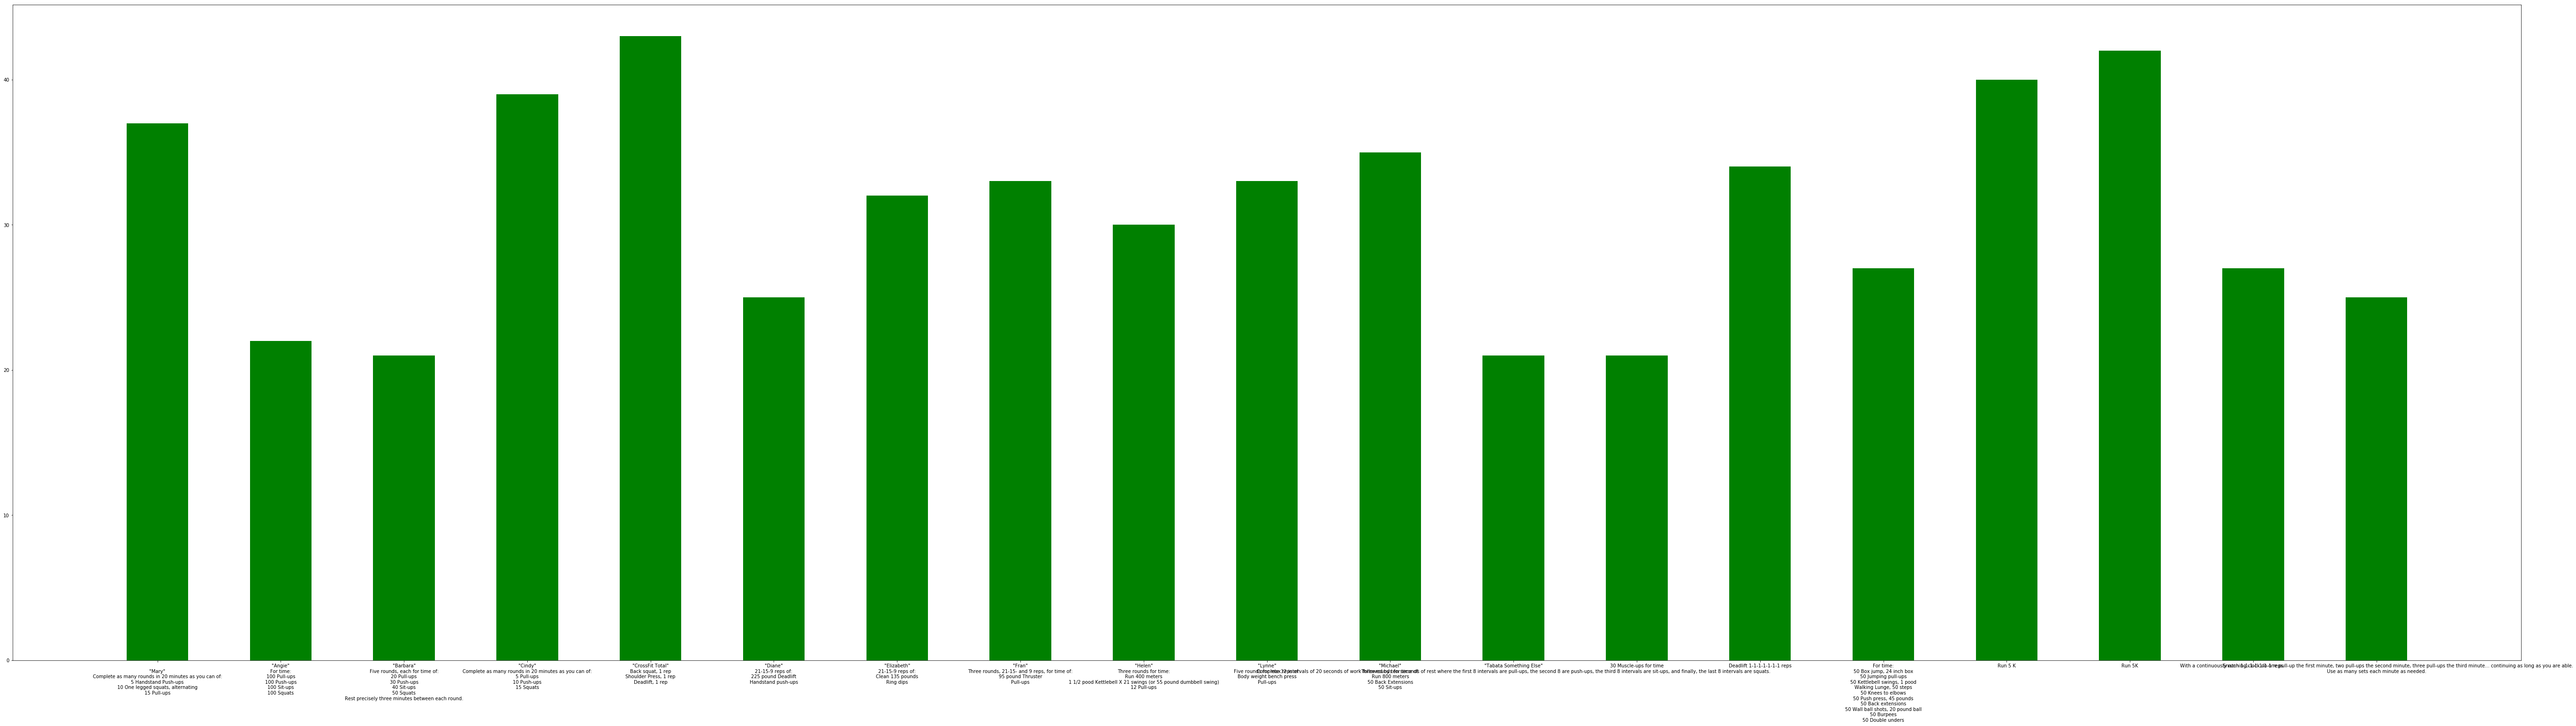

In [6]:
#plot top exercise frequencies

ex_freq = {}
unwanted_chars = "''"
for raw_string in data4:
    string = raw_string.strip(unwanted_chars)
    if string not in ex_freq:
        ex_freq[string] = 0 
    ex_freq[string] += 1
del ex_freq['']
#most frequent workouts 
ex_freq2 = dict((key, value) for key, value in ex_freq.items() if value > 20)


%matplotlib inline

width=.5
fig = plt.figure(figsize=(75, 20))
ax = fig.add_subplot(111)
plt.tight_layout()

plt.bar(ex_freq2.keys(), ex_freq2.values(), width, color='g')

<Container object of 69 artists>

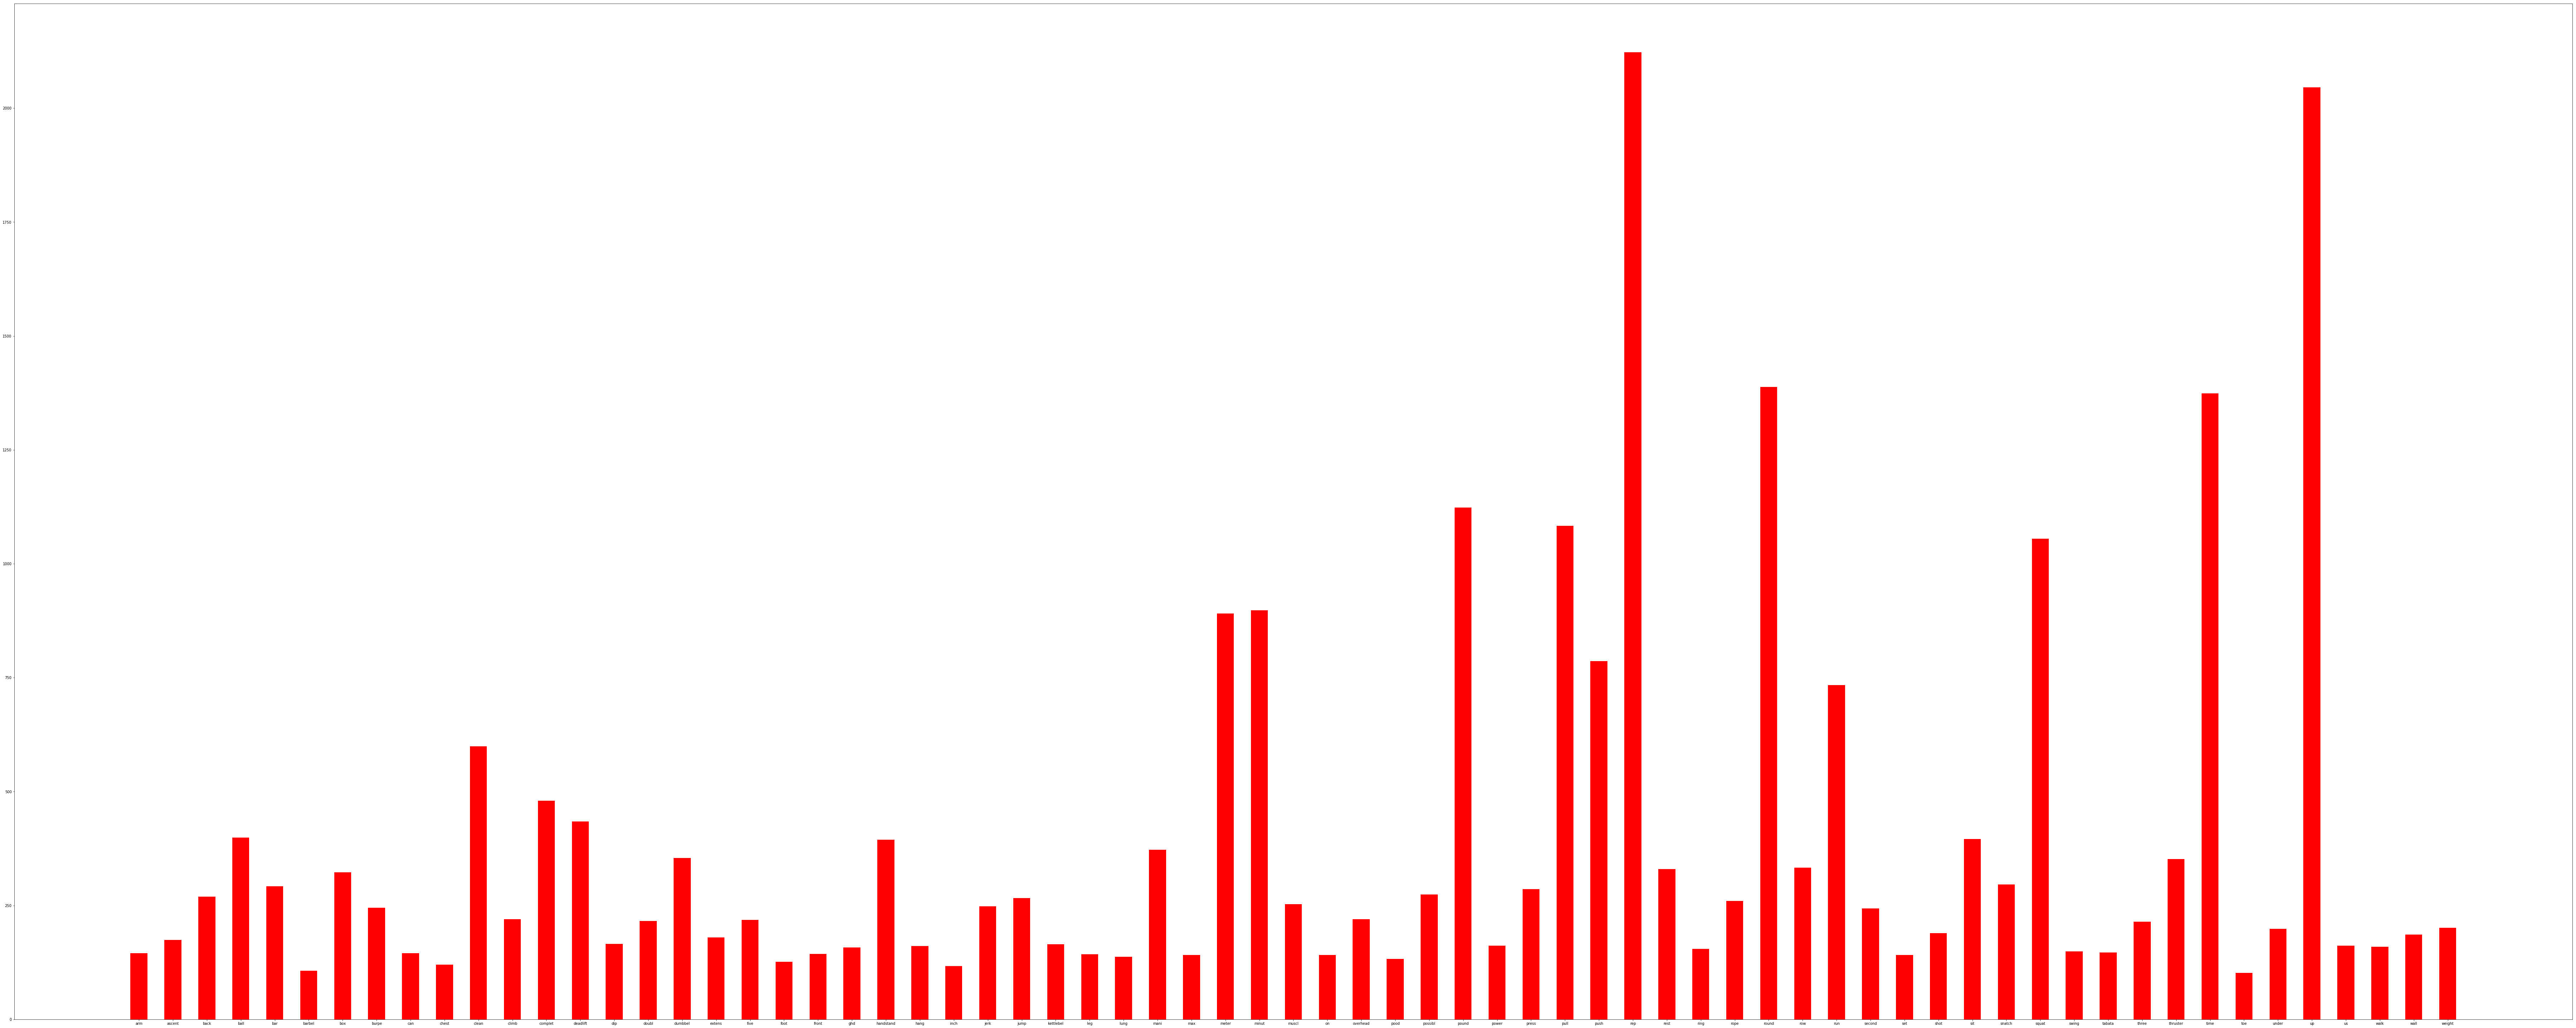

In [7]:
#plot frequencies of top words in workouts -> help to understand types of workouts crossfit offers

stop_words = get_stop_words('en')
p_stemmer = PorterStemmer()

top_word=[]
top_words=[]
for words in final_data:
    words2=words.lower()
    top_word = re.sub("[^\w]", " ",  words2).split()
    top_word2 = [i for i in top_word if not i in stop_words]
    top_word3 = [i for i in top_word2 if len(i) > 2]
    top_word4 = [i for i in top_word3 if not i.isdigit()]
    stemmed_words = [p_stemmer.stem(i) for i in top_word4]

    for i in stemmed_words:
        top_words.append(i)

word_freq = {}
for word in top_words:
    if word not in word_freq:
        word_freq[word] = 0 
    word_freq[word] += 1

word_freq2 = dict((key, value) for key, value in word_freq.items() if value > 100)

%matplotlib inline
width=.5
fig = plt.figure(figsize=(100, 40))
ax = fig.add_subplot(111)
plt.tight_layout()

plt.bar(word_freq2.keys(), word_freq2.values(), width, color='r')

**High Frequency Words:**
1. *REPS* -> level of intensity
2. *UP* -> bodyweight exercises (pull-ups, push-ups, sit-ups, etc.)
3. *TIME* -> workout based on speed
4. *ROUND* -> workouts based on amnount of work to complete
5. *POUND* -> weighted exercises

In [8]:
#tokenize and process data for modeling

tokenizer = RegexpTokenizer(r'\w+')
stop_words = get_stop_words('en')
p_stemmer = PorterStemmer()

taggeddoc=[]
texts=[]

for index,wod in enumerate(model_data):
    wordslist=[]
    tagslist=[]
    tokens = tokenizer.tokenize(wod.lower())
    
    #stop words
    stopped_tokens = [i for i in tokens if not i in stop_words]
    
    #remove numbers
    number_tokens = [re.sub(r'[\d]', ' ', i) for i in stopped_tokens]
    number_tokens = ' '.join(number_tokens).split()
    
    #stemmed tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in number_tokens]
    
    #remove empty
    length_tokens = [i for i in stemmed_tokens if len(i)  > 1]
    texts.append(length_tokens)
    
    td = TaggedDocument(gensim.utils.to_unicode(str.encode(' '.join(stemmed_tokens))).split(), [str(index)]) 
    taggeddoc.append(td)
    
documents=taggeddoc

In [9]:
print(documents[0], "\n\n")
print(model_data[0])

TaggedDocument(['four', 'round', 'time', 'dip', 'bodi', 'weight', 'power', 'clean', 'rep'], ['0']) 


Four rounds for time of:
15 Dips
1/2 Body weight power cleans, 12 reps


In [10]:
#initialize and train model

from random import shuffle

def modelBuild(iterations, size, word_count):
    global modelsDF
    modelsDF=pd.DataFrame(columns=['Model','Iteration','Dimensionality_Size','Min_Word_Count'])
    
    for i in range(100, iterations+1, 10): 
        for j in range(3, size+1):
            for k in range(7, word_count+1):
                
                #model initialization
                model=gensim.models.Doc2Vec(dm=0, dbow_words=1, size=i, iter=j, min_count=k, alpha=0.025, min_alpha=0.025)
                
                #build vocabulary
                shuffle(documents)
                model.build_vocab(documents)
               
                #train model
                model.train(documents, total_examples=len(documents), epochs=model.iter)
                
                #append model to modelsDF
                modelsDF = modelsDF.append({'Model': model, 'Iteration': i, 'Dimensionality_Size': j, 'Min_Word_Count': k}, ignore_index=True)
                

In [11]:
#Generate models
modelBuild(200, 8, 20)

In [12]:
#create list of similar workouts for each model

stop_words = get_stop_words('en')

def similarWODS(string):
    global modelWOList
    modelWOList=[]
    for i in range(len(modelsDF)):
        WOList=[]
        modeltest=modelsDF.loc[i][0]
        user_input = string.lower()
        user_words = user_input.split()
        user_input2 = [i for i in user_words if not i in stop_words]
        user_vector = modeltest.infer_vector(user_input2)
        sims = modeltest.docvecs.most_similar([user_vector], topn=7)
        for j in sims:
            for idx, k in enumerate(j):
                if idx%2 == 0:
                    WOIdx = int(k)
                    TopWO = final_data[WOIdx]
                    WOList.append(TopWO)
                    
        modelWOList.append(WOList)
        
    for idx, wod in enumerate(modelWOList):
        print("* Model Numder", idx, "*")
        print("Workout of Interest:", "\n", string, "\n", "-"*20)
        for wo in wod:
            print(wo, "\n", "-"*40)
            
#     return modelWOList

In [13]:
#model evaluation
#check for number of matches and percent of matching words between inputted workout and top similar workouts

stop_words = get_stop_words('en')

def modelEval(workoutOfInterest):
    
    WOofInterest = workoutOfInterest.split()
    WOofInterest2 = [i for i in WOofInterest if not i in stop_words]
    WOofInterest3 = [i for i in WOofInterest2 if not i.isdigit()]

    modelMatches=[]
    modelPercent=[]

    for i in range(len(modelWOList)):
        matchList=[]
        matchListPercent=[]
        for j in modelWOList[i]:
            raw = j.lower()
            words = raw.split()
            final = [i for i in words if not i in stop_words]
            final2 = [i for i in final if len(i) > 2]
            final3 = [i for i in final2 if not i.isdigit()]

            results={}
            for k in WOofInterest3:
                r_key = '{}'.format(k)
                results[r_key] = final3.count(k)

            matches = sum(results.values())
            matchList.append(matches)
            matchPercent = matches/len(set(final))
            matchListPercent.append(matchPercent)

        modelMatchSum = sum(matchList)
        modelMatches.append((i, modelMatchSum))
        modelPerc = sum(matchListPercent)/len(modelWOList)
        modelPercent.append((i, modelPerc))


    #highest perorming models
    mostMatchesModel=max(modelMatches,key=lambda item:item[1])
    print(mostMatchesModel)
    mostMatchesModelIdx=mostMatchesModel[0]
    print(modelsDF.loc[mostMatchesModelIdx], "\n")

    highestPercentModel=max(modelPercent,key=lambda item:item[1])
    print(highestPercentModel)
    mhighestPercentModelIdx=highestPercentModel[0]
    print(modelsDF.loc[mhighestPercentModelIdx], "\n")
    
    
#     return modelMatches 
#     return modelPercent

In [14]:
#Produce similar workouts based on user input

#input string from user
workout_string = "run and bike"
workout_string2 = workout_string.lower()
similarWODS(workout_string2)

#Evaluate similar workouts based on user input
modelEval(workout_string2)

* Model Numder 0 *
Workout of Interest: 
 run and bike 
 --------------------
Row 10 K 
 ----------------------------------------
Five rounds for reps of:
1 min Wall ball shots, 20 pound
1 min 15 foot rope climb
Run 400m
Rest
Start each round exactly six minutes apart. Your rest period is whatever remains after the run. 
 ----------------------------------------
Three rounds for time of:
Run 800 meters
50 Wall ball shots, 20 pound ball 
 ----------------------------------------
3 rounds for time of:
1,200-m run
20 L pull-ups
30 hip extensions, holding a 25-lb. plate 
 ----------------------------------------
Run 5k 
 ----------------------------------------
Three rounds for time of:
Walk on hands, 100 feet
Hold handstand against wall for two minutes
15 Handstand push-ups 
 ----------------------------------------
For time:
100 hip-back extensions
Each time you break a set or rest at the bottom, stop and perform 15 wall-ball shots. 
 ----------------------------------------
* Model Numd

150 Wallball shots, 20 pound ball 
 ----------------------------------------
Give 30 minutes to handstand and handwalking practice. 
 ----------------------------------------
Complete 5 rounds for time:
Run 400 meters
50 Squats 
 ----------------------------------------
* Model Numder 133 *
Workout of Interest: 
 run and bike 
 --------------------
Four rounds, each for time of:
800 meter run
Rest as needed between efforts. 
 ----------------------------------------
4 rounds, each for time of:
800-meter run
Rest as needed between efforts. 
 ----------------------------------------
4 rounds, each for time of:
1,000-meter row
Rest as needed between efforts. 
 ----------------------------------------
Four rounds for time of:
Row 500 meters
Rest 3 minutes 
 ----------------------------------------
If you are doing something you do not enjoy,
such as a certain type of work because you
need the money for school, your family, or whatever,
and find yourself complaining and feeling hard
done by

 ----------------------------------------
Run 3 K 
 ----------------------------------------
Run 15 K 
 ----------------------------------------
Servais
For time:
Run 1.5 miles
Then, 8 rounds of:
19 pull-ups
19 push-ups
19 burpees
Then,
400-meter sandbag carry (heavy)
1-mile farmers carry with 45-lb. dumbbells 
 ----------------------------------------
Run or Row 10K 
 ----------------------------------------
Run 5k 
 ----------------------------------------
* Model Numder 238 *
Workout of Interest: 
 run and bike 
 --------------------
Run 5K 
 ----------------------------------------

Bike 1000 meters 
 ----------------------------------------
For time:
150 Squats
Run 800 meters
150 Squats 
 ----------------------------------------
Run or Row 10 K 
 ----------------------------------------
Bike 30K 
 ----------------------------------------
3 rounds for time of:
Row 1,000 meters
Run 800 meters 
 ----------------------------------------
Run 10K 
 --------------------------------------

Workout of Interest: 
 run and bike 
 --------------------
Run 10 K
The steeper the better. 
 ----------------------------------------
Run 15 K 
 ----------------------------------------
Run or row 10K 
 ----------------------------------------
For time:
Row 1K
Thruster 75 X 50 (75 lbs & 50 reps)
Row 1K 
 ----------------------------------------
For 20 minutes:
Run 400 meters
Rest precisely the time of the previous run 
 ----------------------------------------
Run 5k 
 ----------------------------------------
For time:
Run 400 meters
45 pound barbell Thruster, 50 reps
Run 400 meters
50 Burpees
Run 400 meters
45 pound barbell Hang squat clean, 50 reps
Run 400 meters 
 ----------------------------------------
* Model Numder 359 *
Workout of Interest: 
 run and bike 
 --------------------
For time:
Max set of pull-ups
800 meter Run
Max set of pull-ups
400 meter Run
Max set of pull-ups
200 meter Run 
 ----------------------------------------
7-km trail run
Find a route that follows the st

 ----------------------------------------
Four rounds for time:
Run 400 meters
Rest 2 minutes 
 ----------------------------------------
Row 2,000 meters 
 ----------------------------------------
5 rounds for time of:
Swim 200 meters
Rest 2 minutes 
 ----------------------------------------
1 rep-max Snatch
Ten minute time limit, not including warm up. 
 ----------------------------------------
* Model Numder 496 *
Workout of Interest: 
 run and bike 
 --------------------
Row 10,000 meters 
 ----------------------------------------
Run 1 mile 
 ----------------------------------------
Four rounds for time of:
Run 400 meters
50 sit-ups 
 ----------------------------------------
Three rounds for time of:
Row 1000 meters
Run 800 meters 
 ----------------------------------------
"Hamilton"
Three rounds for time of:
Row 1000 meters
50 Push-ups
Run 1000 meters
50 Pull-ups 
 ----------------------------------------
3 rounds for time of:
Row 1,000 meters
Run 800 meters 
 --------------------

4 rounds, each for time of:
1-mile bike
Rest as needed between efforts. Use a stationary bike or find 1-mile course to repeat each round. 
 ----------------------------------------
Row 5K 
 ----------------------------------------
For time:
20-calorie bike
165-lb. clean and jerks, 20 reps
20-calorie bike
If you don’t have an indoor bike, use a rower. 
 ----------------------------------------
* Model Numder 617 *
Workout of Interest: 
 run and bike 
 --------------------
Deadlift 7-7-7-7-7-7-7 reps
For each set, touch and go at ground only. 
 ----------------------------------------
Establish your 1-rep-max deadlift
Then, with a barbell loaded to 50 percent of your max deadlift:
15 cleans for time
12 cleans for time
9 cleans for time
Rest as needed between each set. 
 ----------------------------------------
Clean & Jerk 15-12-9 reps
Use same load for all three sets. Rest as needed between efforts. 
 ----------------------------------------
Grace
135-lb. clean and jerks, 30 reps
Use 95

 ----------------------------------------
How many times can you take 135 pounds from ground to overhead in 10 minutes? 
 ----------------------------------------
Back Squat 3-2-2-2-1-1-1-1-1 reps 
 ----------------------------------------
Front Squat 1-1-1-1-1-1-1-1-1-1 
 ----------------------------------------
Back squat 3-2-2-2-1-1-1-1-1 reps 
 ----------------------------------------
Back Squat 3-2-2-2-1-1-1-1-1 reps
After all 9 sets practice the stunt below. 
 ----------------------------------------
Complete three rounds for time of:
Run 800 meters
75 Squats
50 Sit-ups 
 ----------------------------------------
* Model Numder 748 *
Workout of Interest: 
 run and bike 
 --------------------
Swim as far as possible in 30 minutes 
 ----------------------------------------
Complete 7 rounds for time of: 
 ----------------------------------------
Deadlift 3-3-1-1-1-1-1
Go slow and heavy! 
 ----------------------------------------
"Isabel"
For time:
Snatch 135 pounds, 30 reps
Use 95 p

* Model Numder 858 *
Workout of Interest: 
 run and bike 
 --------------------
Overhead Squat 5-5-5-5-5-5-5 
 ----------------------------------------
2014 Regional Event 7
For time:
64 pull-ups
205-lb. overhead squats, 8 reps 
 ----------------------------------------
Five rounds for time of:
Turkish Get-up, 45 pound barbell, 21 reps
Run 400 meters 
 ----------------------------------------

Bike 1000 meters 
 ----------------------------------------
Snatch 5-5-3-3-3-1-1-1-1 reps 
 ----------------------------------------
For time:
Move 700 lb. of odd objects 50 yards and back again
Use plates, dumbbells, sandbags, firewood or whatever you can find to accumulate approximately 700 lb. worth. 
 ----------------------------------------
Deficit deadlift 3-3-3-3-3 reps
Stand on extra plates so that your grip on the barbell is lower than in your normal setup. 
 ----------------------------------------
* Model Numder 859 *
Workout of Interest: 
 run and bike 
 --------------------
4 rounds,

(544, 18)
Model                  Doc2Vec(dbow+w,d160,n5,w5,mc19,s0.001,t3)
Iteration                                                    160
Dimensionality_Size                                            5
Min_Word_Count                                                19
Name: 544, dtype: object 

(333, 0.002922077922077922)
Model                  Doc2Vec(dbow+w,d130,n5,w5,mc18,s0.001,t3)
Iteration                                                    130
Dimensionality_Size                                            8
Min_Word_Count                                                18
Name: 333, dtype: object 



In [15]:
#Produce similar workouts based on random workout from data

np.random.seed(101)

randomWOIdx = int(np.random.randint(low=0, high=final_data_length, size=1, dtype=int))
random_workout_string = final_data[randomWOIdx]
random_workout_string2 = random_workout_string.lower()
similarWODS(random_workout_string2)

#Evaluate similar workouts based on random workout from data
modelEval(random_workout_string2)

* Model Numder 0 *
Workout of Interest: 
 tabata front squats 95 pounds.
deadlift 135x21-18-15-12-9-6-3 reps rest 60 seconds between sets.
rest as needed between tabata effort and deadlift. 
 --------------------
Tabata Something Else
Tabata pull-ups
Tabata push-ups
Tabata sit-ups
Tabata squats
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals. 
 ----------------------------------------
Tabata push press, 75 lb.
Tabata sit-up
Tabata sumo deadlift high pull, 75 lb.
Tabata push-up
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals. 
 ----------------------------------------
Tabata push-up
Run 800 meters
Tabata sit-ups
Run 800 meters
Tabata jumping pull-ups
Run 800 meters
Rest 60 seconds after each Tabata effort and after each run effort. The Tabata interval is 8 intervals of 20 seconds work and 10 seconds rest. It is scored by the least number of reps achieved in the 8 intervals. 
 ------------------------------

Tabata Squats
Rest 4 minutes
Tabata Squats
Rest 4 minutes
Tabata Squats 
 ----------------------------------------
Without rest between exercises:
Tabata Squat
Tabata Sit-up
Tabata Push-up
Tabata Pull-up 
 ----------------------------------------
Tabata push-up
Run 800 meters
Tabata sit-ups
Run 800 meters
Tabata jumping pull-ups
Run 800 meters
Rest 60 seconds after each Tabata effort and after each run effort. The Tabata interval is 8 intervals of 20 seconds work and 10 seconds rest. It is scored by the least number of reps achieved in the 8 intervals. 
 ----------------------------------------
Tabata Squats
Tabata Push-ups
Tabata Squats 
 ----------------------------------------
Tabata squat
Tabata deadlift, 155 lb.
Tabata squat
Tabata deadlift, 155 lb.
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals. 
 ----------------------------------------
* Model Numder 141 *
Workout of Interest: 
 tabata front squats 95 pounds.
deadlift 135x21-18-15-12-9-

 --------------------
Tabata Squats
Rest
Tabata Squats
Rest
Tabata Squats 
 ----------------------------------------
Without rest between exercises:
Tabata Squat
Tabata Sit-up
Tabata Push-up
Tabata Pull-up 
 ----------------------------------------
Tabata Squats
Tabata Push-ups
Tabata Squats 
 ----------------------------------------
Tabata front squats 95 pounds.
Deadlift 135X21-18-15-12-9-6-3 reps rest 60 seconds between sets.
Rest as needed between Tabata effort and deadlift. 
 ----------------------------------------
50 Sit-ups
Tabata front squat 65 pounds
50 Sit-ups 
 ----------------------------------------
Tabata Squats
Rest 4 minutes
Tabata Squats
Rest 4 minutes
Tabata Squats 
 ----------------------------------------
Tabata Sit-ups
Run 1 mile
Tabata Sit-ups 
 ----------------------------------------
* Model Numder 242 *
Workout of Interest: 
 tabata front squats 95 pounds.
deadlift 135x21-18-15-12-9-6-3 reps rest 60 seconds between sets.
rest as needed between tabata effort an

 ----------------------------------------
Tabata push-up
Run 800 meters
Tabata sit-ups
Run 800 meters
Tabata jumping pull-ups
Run 800 meters
Rest 60 seconds after each Tabata effort and after each run effort. The Tabata interval is 8 intervals of 20 seconds work and 10 seconds rest. It is scored by the least number of reps achieved in the 8 intervals. 
 ----------------------------------------
Tabata Something Else
Tabata pull-ups
Tabata push-ups
Tabata sit-ups
Tabata squats
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals. 
 ----------------------------------------
* Model Numder 333 *
Workout of Interest: 
 tabata front squats 95 pounds.
deadlift 135x21-18-15-12-9-6-3 reps rest 60 seconds between sets.
rest as needed between tabata effort and deadlift. 
 --------------------
Tabata Squats
Rest
Tabata Squats
Rest
Tabata Squats 
 ----------------------------------------
Resting 60 seconds between sets:
Deadlift 2-2-2-2-2-2-2-2-2-2 
 -------------

 ----------------------------------------
Body-weight back-squat ladder
Rest 5 minutes
3/4 body-weight push-press ladder
Rest 5 minutes
1 1/2 body-weight deadlift ladder
For the ladder pattern, perform one rep the first minute, two reps the second minute, three reps the third minute, continuing as long as you are able. Use as many sets each minute as needed. 
 ----------------------------------------
10 rounds of:
1 minute of rowing
Rest 15 seconds
30 seconds of 95-lb. shoulder press
Rest 15 seconds 
 ----------------------------------------
Shawn
For time:
Run 5 miles
Run in 5-minute intervals, stopping after each to perform 50 squats and 50 push-ups before beginning the next 5-minute run interval. 
 ----------------------------------------
Run 1 mile.
Bench Press bodyweight 21 reps.
Rest, repeat off clock. 
 ----------------------------------------
* Model Numder 434 *
Workout of Interest: 
 tabata front squats 95 pounds.
deadlift 135x21-18-15-12-9-6-3 reps rest 60 seconds between se

rest as needed between tabata effort and deadlift. 
 --------------------
Tabata Squats
Rest
Tabata Squats
Rest
Tabata Squats 
 ----------------------------------------
Tabata Squats
Rest 4 minutes
Tabata Squats
Rest 4 minutes
Tabata Squats 
 ----------------------------------------
Tabata squat
Tabata deadlift, 155 lb.
Tabata squat
Tabata deadlift, 155 lb.
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals. 
 ----------------------------------------
Tabata push-up
Run 800 meters
Tabata sit-ups
Run 800 meters
Tabata jumping pull-ups
Run 800 meters
Rest 60 seconds after each Tabata effort and after each run effort. The Tabata interval is 8 intervals of 20 seconds work and 10 seconds rest. It is scored by the least number of reps achieved in the 8 intervals. 
 ----------------------------------------
Without rest between exercises:
Tabata Squat
Tabata Sit-up
Tabata Push-up
Tabata Pull-up 
 ----------------------------------------
Quarter Gone Bad
5 r

* Model Numder 674 *
Workout of Interest: 
 tabata front squats 95 pounds.
deadlift 135x21-18-15-12-9-6-3 reps rest 60 seconds between sets.
rest as needed between tabata effort and deadlift. 
 --------------------
Tabata Barbell
Tabata deadlift, 185 lb.
Tabata hang power clean, 135 lb.
Tabata front squat, 85 lb.
Tabata push press,  65 lb.
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals. Rest one minute between exercises. 
 ----------------------------------------
"Test 3"
Tabata Squat
Max reps of Muscle-ups in 4 minutes
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals. Tabata score is the least number of reps performed in any of the eight intervals. Begin time for muscle-ups immediately after the last 10 second rest interval. Test score equals Tabata score multiplied by number of muscle-ups completed. 
 ----------------------------------------
Tabata Double-under
The Tabata interval is 20 seconds of work 

Max effort on rows. Rest as needed before and after Snatch efforts. Tabata protocol is 20 seconds of work followed by 10 seconds of rest for eight intervals. 
 ----------------------------------------
Eight rounds for max reps of:
Muscle-ups, 20 seconds
Rest 10 seconds
135 pound Clean and jerk, 20 seconds
Rest 10 seconds 
 ----------------------------------------
Quarter Gone Bad
5 rounds for total reps of:
135-lb. thrusters, 15 seconds
Rest 45 seconds
50-lb. weighted pull-ups, 15 seconds
Rest 45 seconds
Burpees, 15 seconds
Rest 45 seconds 
 ----------------------------------------
Tabata Weighted pull-up, 30 pound dumbbell
Rest 1 minute
Tabata Weighted squat, 45 pound plate
Rest 1 minute
Tabata Weighted ring dip, 30 pound dumbbell
Rest 1 minute
Tabata Deadlift, 165 pound barbelll
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals.
Tabata score is the least number of reps performed in any of the eight intervals. 
 ----------------------------------

 ----------------------------------------
Tabata push-ups
Run 2 miles
Bottom-to-bottom Tabata squats
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals. Avoid lousy push-ups (see CFJ 7). For the Tabata squats, remain in the bottom position for the rest intervals, and immediately return to the bottom position after full extension. No resting at the top. 
 ----------------------------------------
"Tabata This!"
Tabata Row
Rest 1 minute
Tabata Squat
Rest 1 minute
Tabata Pull-up
Rest 1 minute
Tabata Push-up
Rest 1 minute
Tabata Sit-up
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals.
Tabata score is the least number of reps performed in any of the eight intervals. Unit for the row is "calories". 
 ----------------------------------------
Tabata squat
Tabata deadlift, 155 lb.
Tabata squat
Tabata deadlift, 155 lb.
The Tabata interval is 20 seconds of work followed by 10 seconds of rest for 8 intervals. 
 ----------

(613, 97)
Model                  Doc2Vec(dbow+w,d170,n5,w5,mc18,s0.001,t3)
Iteration                                                    170
Dimensionality_Size                                            4
Min_Word_Count                                                18
Name: 613, dtype: object 

(477, 0.009494176458462173)
Model                  Doc2Vec(dbow+w,d150,n5,w5,mc8,s0.001,t3)
Iteration                                                   150
Dimensionality_Size                                           7
Min_Word_Count                                                8
Name: 477, dtype: object 



**MODEL EVALUATION**

1. Evaluate Model based on User Input
    * Size --> range(3,8)
    * Minimum Word Count --> range(11, 19)
    * Model Iterations --> range(100, 1600)
    
 
2. Evaluate Model based on Random Workout from Data
    * Size --> range(3,7)
    * Minimum Word Count --> range(13, 19)
    * Model Iterations --> range(130, 190)

**Imporovements**
1. **Data Cleaning** Regex to rewmove extra tetx
2. **Model Evaluation** Cosine Similarity between words from User-Input/Random Workout and similar workouts
3. **Additional Data** Data from different sources --> varied and well-rounded workouts
4. **Add Features** tailor workouts based on user input --> skill level, strength, etc. 
5. **Improve Model** Exercise optimizer --> creates workouts based on individual exercises

In [ ]:
#save model
# model.save('Saved Model/WO_trained.model')